#### Why regularize? 
1. Recall: Linear regression minimizes a loss function 
2. It chooses a coefficient for each feature variable 
3. Large coeﬃcients can lead to overfitting 
4. Penalizing large coefficients: Regularization

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [142]:
Data = pd.read_csv("Datasets/FuelConsumption.csv")
Data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [143]:
Data.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [144]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [145]:
Data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


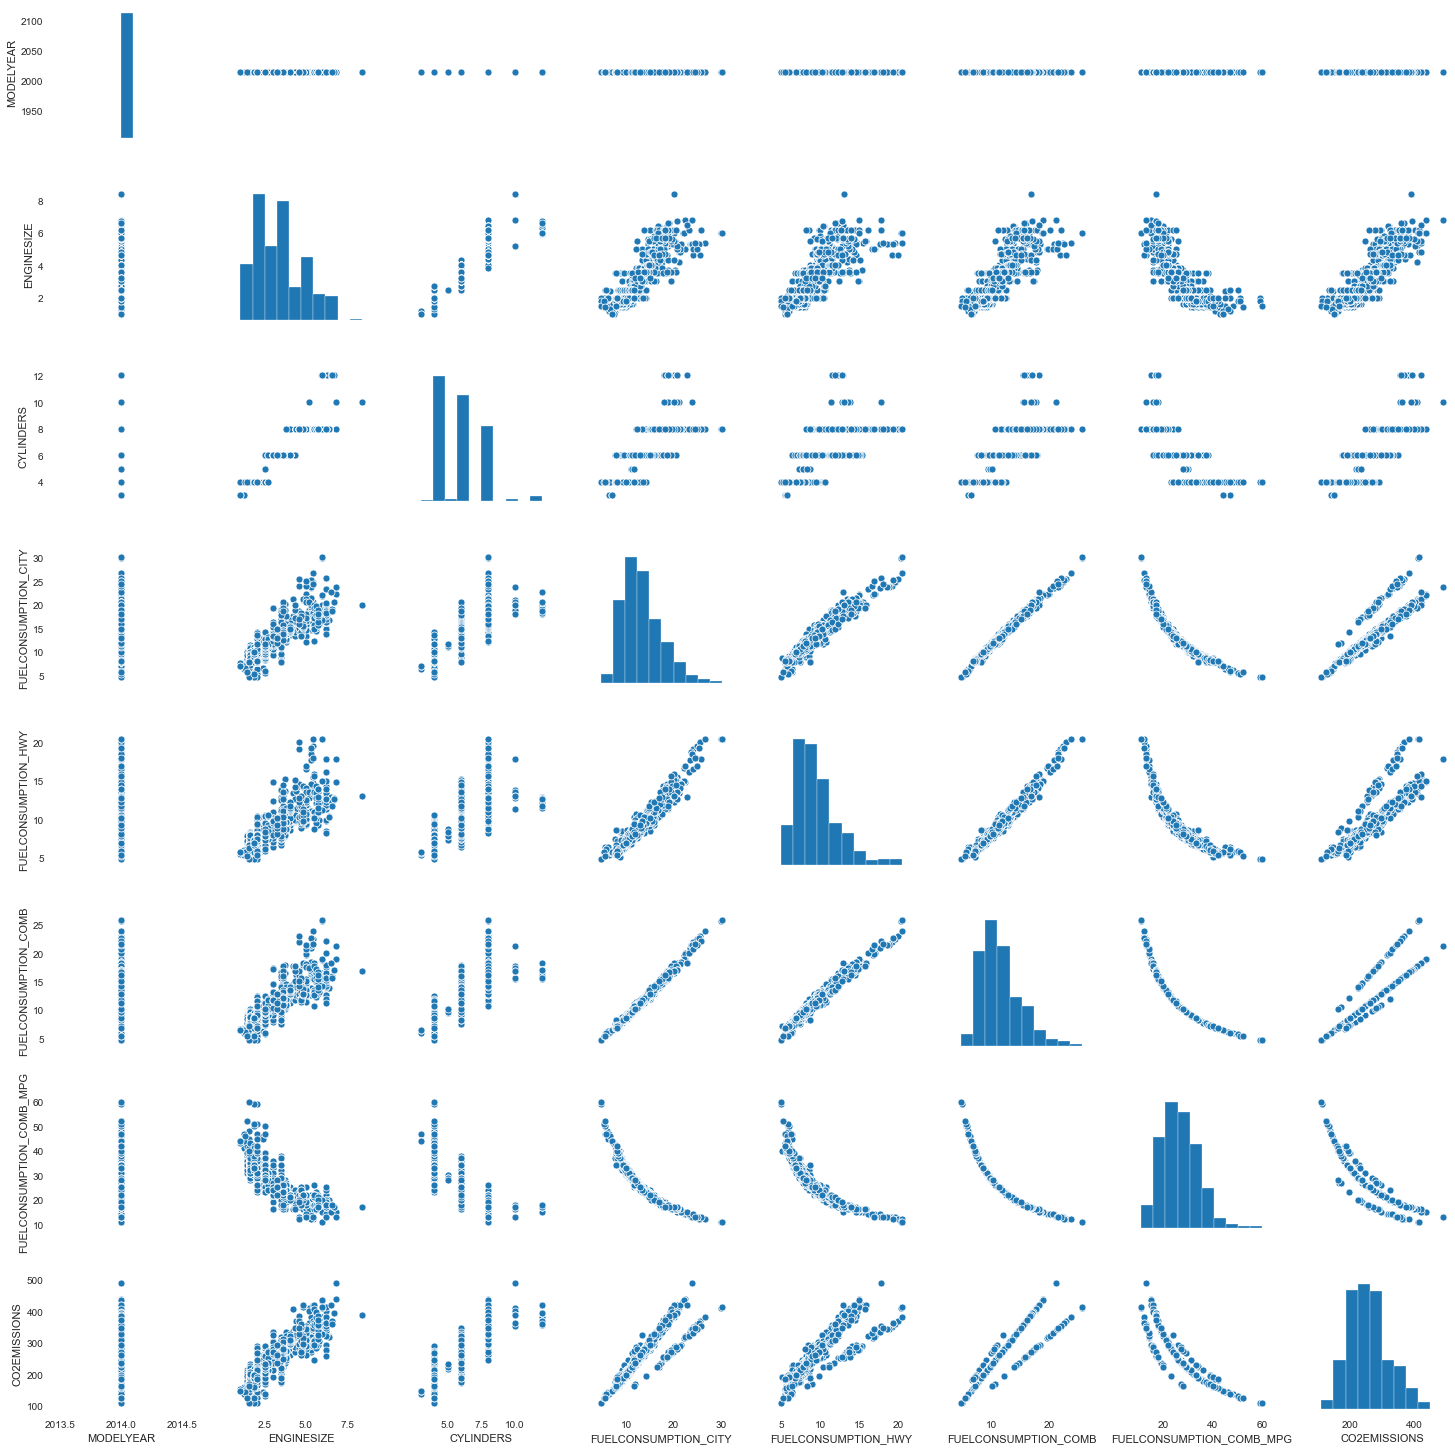

In [146]:
sns.pairplot(Data)

In [147]:
Data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [148]:
Features = Data[['MODELYEAR','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Target = Data.CO2EMISSIONS

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(Features,Target)

In [151]:
x_train.shape

(800, 7)

In [152]:
x_test.shape

(267, 7)

In [153]:
y_test.shape

(267,)

In [154]:
y_train.shape

(800,)

In [155]:
from sklearn.linear_model import LinearRegression,Ridge
lm = LinearRegression().fit(x_train,y_train)

In [156]:
lm

LinearRegression()

In [157]:
lm.coef_

array([  0.        ,   8.84342316,   7.37430555, -14.59125264,
        -6.6863634 ,  24.93128461,  -3.86161003])

In [158]:
lm.intercept_

254.45422841961658

In [159]:
Lm_predication=lm.predict(x_test)

In [160]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Predication":Lm_predication,
             "Error":y_test-Lm_predication})  # ind Error 

,Actual_Data,New_Predication,Error
325,250,304.767548,-54.767548
168,294,278.178495,15.821505
750,297,311.007318,-14.007318
141,290,278.481955,11.518045
619,214,210.586325,3.413675
...,...,...,...
1022,216,211.742181,4.257819
860,398,349.434632,48.565368
344,350,369.895256,-19.895256
763,256,307.047504,-51.047504


In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [162]:
mean_squared_error(y_test,Lm_predication)

382.1357819329029

In [163]:
mean_absolute_error(y_test,Lm_predication)

12.749610026419644

In [164]:
Trian_Score = lm.score(x_train,y_train) #75%
print("Train Score of a model is :",Trian_Score)

Train Score of a model is : 0.8872923229957405


In [165]:
Test_Score = lm.score(x_test,Lm_predication)   #25 %
print("Test Score of a Model is:",Test_Score)

Test Score of a Model is: 1.0


1. if Train Score is More then Test Score we can called it as **Overfitting**
2. if Train Score is less and Test Score is More then it is called **Underfitting**

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
CV = cross_val_score(lm,x_train,y_train,cv=20)
CV

array([0.90891755, 0.91703955, 0.90140423, 0.92436129, 0.89629816,
       0.70523441, 0.86381382, 0.86510505, 0.85609365, 0.89169433,
       0.84282372, 0.88916743, 0.90038548, 0.8741445 , 0.85421411,
       0.90750745, 0.8746869 , 0.89074638, 0.84836342, 0.93467033])

In [168]:
np.mean(CV)

0.877333587866653

In [169]:
np.max(CV)

0.9346703291847989

In [170]:
np.min(CV)

0.7052344120116639

In [171]:
from sklearn.model_selection import KFold

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png)

In [172]:
Cv_k = KFold(n_splits=2)

In [173]:
Cv_k.get_n_splits(Features)

2

In [174]:
print(Cv_k)

KFold(n_splits=2, random_state=None, shuffle=False)


In [175]:
for train_index,test_index in Cv_k.split(x_train):
    print("Train",train_index,"Test",test_index)

Train [400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579
 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597
 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633
 634 635 636 637 638 639 640 641 642 643 644 

### Ridge Regulization

Ridge Formula: **Sum of Error + Sum of the squares of coefficients**

$L = ∑( Ŷi– Yi)² + λ∑ β²$

In [176]:
Rg = Ridge(alpha=1) ## Regulization parameters 

In [177]:
Rg.fit(x_train,y_train)

Ridge(alpha=1)

In [178]:
Rg.coef_

array([ 0.        ,  8.82266377,  7.39403916, -5.42880004,  0.82037938,
        8.26235681, -3.86342082])

In [179]:
pd.DataFrame({"Features":Features.columns,
              "Linear_Coefficent":lm.coef_,
             "Ridge_Coefficent":Rg.coef_})

,Features,Linear_Coefficent,Ridge_Coefficent
0,MODELYEAR,0.000000,0.000000
1,ENGINESIZE,8.843423,8.822664
2,CYLINDERS,7.374306,7.394039
3,FUELCONSUMPTION_CITY,-14.591253,-5.428800
4,FUELCONSUMPTION_HWY,-6.686363,0.820379
5,FUELCONSUMPTION_COMB,24.931285,8.262357
6,FUELCONSUMPTION_COMB_MPG,-3.861610,-3.863421


In [180]:
Rg.intercept_

254.55831574915976

In [181]:
Rg_predicted = Rg.predict(x_test)

In [182]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Rg_predication":Rg_predicted,
              'Rg_Error':y_test-Rg_predicted,
              "Linear_new_predication":Lm_predication,
              "Lm_error":y_test-Lm_predication
             })

,Actual_Data,New_Rg_predication,Rg_Error,Linear_new_predication,Lm_error
325,250,304.610503,-54.610503,304.767548,-54.767548
168,294,277.593925,16.406075,278.178495,15.821505
750,297,310.842332,-13.842332,311.007318,-14.007318
141,290,278.901967,11.098033,278.481955,11.518045
619,214,210.156861,3.843139,210.586325,3.413675
...,...,...,...,...,...
1022,216,211.147172,4.852828,211.742181,4.257819
860,398,349.025650,48.974350,349.434632,48.565368
344,350,369.933229,-19.933229,369.895256,-19.895256
763,256,307.146603,-51.146603,307.047504,-51.047504


In [183]:
mean_squared_error(y_test,Rg_predicted)

381.50692584414656

In [184]:
mean_absolute_error(y_test,Rg_predicted)

12.792532577648082

#### Task:
1. Apply Cross Val Score to Ridge
2. Apply kfold to this Ridge

#### Ridge Cross Validation Process

In [185]:
from sklearn.linear_model import RidgeCV

In [186]:
Ridge_CV = RidgeCV()

In [187]:
Ridge_CV.fit(x_train,y_train)   # Train Data

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [188]:
Ridge_CV.coef_

array([ 0.        ,  8.61801591,  7.4276756 , -1.87916521,  3.4978025 ,
        2.04850146, -3.85981702])

In [189]:
Ridge_CV.intercept_

254.3542866513347

In [190]:
Ridge_CV_predication = Ridge_CV.predict(x_test)  ## Test Data 

In [191]:
pd.DataFrame({"Actual_Data":y_test,
             "New_predicated_Data":Ridge_CV_predication,
             "Error":y_test-Ridge_CV_predication})

,Actual_Data,New_predicated_Data,Error
325,250,304.635322,-54.635322
168,294,277.502892,16.497108
750,297,310.524361,-13.524361
141,290,279.082115,10.917885
619,214,210.146328,3.853672
...,...,...,...
1022,216,211.050739,4.949261
860,398,348.717604,49.282396
344,350,369.973052,-19.973052
763,256,307.203247,-51.203247


In [192]:
mean_squared_error(y_test,Ridge_CV_predication)

381.3969370144208

In [193]:
mean_absolute_error(y_test,Ridge_CV_predication)

12.784313922604222

In [194]:
CV = cross_val_score(Ridge_CV,x_train,y_train,cv=20)
CV

array([0.91221221, 0.91825015, 0.90069735, 0.92540368, 0.89569448,
       0.70446955, 0.86212404, 0.86526266, 0.85675418, 0.89082818,
       0.84515704, 0.88859284, 0.90170202, 0.87407419, 0.85379503,
       0.90830788, 0.87309387, 0.89004115, 0.84995704, 0.93522908])

In [195]:
np.min(CV)

0.7044695514687606

In [196]:
np.max(CV)

0.9352290777763119

In [197]:
np.mean(CV)

0.8775823312578279

#### Lasso(L1):

Lasso Formula: **Lasso = Sum of Error + Sum of the absolute value of coefficients**

$L = ∑( Ŷi– Yi)² + λ∑ |β|$

In [198]:
from sklearn.linear_model import Lasso

In [199]:
ls = Lasso(alpha=1.0)

In [200]:
ls.fit(x_train,y_train)

Lasso()

In [201]:
Lasso_Train_Score = ls.score(x_train,y_train)

In [202]:
print("Train Score For Lasso",Lasso_Train_Score)

Train Score For Lasso 0.88676673983507


In [203]:
Lasso_Test_Score = ls.score(x_test,y_test)

In [204]:
print("Test Score For Lasso",Lasso_Test_Score)

Test Score For Lasso 0.8954367388319173


In [205]:
ls.coef_

array([ 0.        ,  7.36119096,  7.46320006,  0.        ,  3.50179258,
        0.        , -3.94665504])

In [206]:
pd.DataFrame({"Features":Features.columns,
              "Linear_Coefficent":lm.coef_,
             "Ridge_Coefficent":Rg.coef_,
             "Lasso_coef":ls.coef_})

,Features,Linear_Coefficent,Ridge_Coefficent,Lasso_coef
0,MODELYEAR,0.000000,0.000000,0.000000
1,ENGINESIZE,8.843423,8.822664,7.361191
2,CYLINDERS,7.374306,7.394039,7.463200
3,FUELCONSUMPTION_CITY,-14.591253,-5.428800,0.000000
4,FUELCONSUMPTION_HWY,-6.686363,0.820379,3.501793
5,FUELCONSUMPTION_COMB,24.931285,8.262357,0.000000
6,FUELCONSUMPTION_COMB_MPG,-3.861610,-3.863421,-3.946655


In [207]:
ls_predication = ls.predict(x_test)

In [208]:
Lasso_Error = mean_squared_error(y_test,ls_predication)
Lasso_Error

383.17672822042795

In [209]:
mean_absolute_error(y_test,ls_predication)

12.600752382235791

In [210]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Rg_predication":Rg_predicted,
              'Rg_Error':y_test-Rg_predicted,
              "Linear_new_predication":Lm_predication,
              "Lm_error":y_test-Lm_predication,
              "Lasso_Predication":ls_predication,
              "Lasso_Error":y_test-ls_predication
             })

,Actual_Data,New_Rg_predication,Rg_Error,Linear_new_predication,Lm_error,Lasso_Predication,Lasso_Error
325,250,304.610503,-54.610503,304.767548,-54.767548,305.126039,-55.126039
168,294,277.593925,16.406075,278.178495,15.821505,278.483861,15.516139
750,297,310.842332,-13.842332,311.007318,-14.007318,308.797241,-11.797241
141,290,278.901967,11.098033,278.481955,11.518045,279.534399,10.465601
619,214,210.156861,3.843139,210.586325,3.413675,211.451834,2.548166
...,...,...,...,...,...,...,...
1022,216,211.147172,4.852828,211.742181,4.257819,212.152192,3.847808
860,398,349.025650,48.974350,349.434632,48.565368,347.220461,50.779539
344,350,369.933229,-19.933229,369.895256,-19.895256,368.858019,-18.858019
763,256,307.146603,-51.146603,307.047504,-51.047504,307.191354,-51.191354


### Lasso Cross Validation

In [211]:
from sklearn.linear_model import LassoCV

In [212]:
Lasso_cv = LassoCV(alphas=[0.1,1])

In [213]:
Lasso_cv.fit(x_train,y_train)

LassoCV(alphas=[0.1, 1])

In [214]:
Lasso_cv_Predictation = Lasso_cv.predict(x_test)

In [215]:
pd.DataFrame({"Actula":y_test,
             "Lasso_cv_Predictation":Lasso_cv_Predictation,
             "Error":y_test-Lasso_cv_Predictation})

,Actula,Lasso_cv_Predictation,Error
325,250,304.510187,-54.510187
168,294,277.591478,16.408522
750,297,310.513717,-13.513717
141,290,279.125207,10.874793
619,214,210.206289,3.793711
...,...,...,...
1022,216,211.045562,4.954438
860,398,348.594123,49.405877
344,350,369.545266,-19.545266
763,256,306.942625,-50.942625


In [216]:
mean_absolute_error(y_test,Lasso_cv_Predictation)

12.793141593242362

In [217]:
mean_squared_error(y_test,Lasso_cv_Predictation)

381.40863245434855

### Elastic Net Formula: Ridge + Lasso 


$L = ∑( Ŷi– Yi)² + λ∑ β² + λ∑ |β|$


Elastic Net combines characteristics of both lasso and ridge. Elastic Net reduces the impact of different features while not eliminating all of the features.

In [218]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [219]:
Enet = ElasticNet(alpha=0.1,l1_ratio=0.5)   ## l1--Lasso

In [220]:
Enet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [221]:
Enet_predication = Enet.predict(x_test)


In [222]:
pd.DataFrame({"Actual":y_test,
             "Enet_predication":Enet_predication,
             "Error":y_test-Enet_predication})

,Actual,Enet_predication,Error
325,250,304.894131,-54.894131
168,294,277.985645,16.014355
750,297,309.590877,-12.590877
141,290,279.210572,10.789428
619,214,210.717961,3.282039
...,...,...,...
1022,216,211.502550,4.497450
860,398,348.104907,49.895093
344,350,369.849044,-19.849044
763,256,307.180434,-51.180434


In [223]:
Enet_Train_score = Enet.score(x_train,y_train)

In [224]:
Enet_Train_score

0.8870328948147286

In [225]:
Enet_Test_score =Enet.score(x_test,Enet_predication)

In [226]:
Enet_Test_score

1.0

In [227]:
Enet_cv = ElasticNetCV()

In [228]:
Enet_cv.fit(x_train,y_train)

ElasticNetCV()

In [229]:
Enet_cv_predict=Enet_cv.predict(x_test)

In [230]:
pd.DataFrame({"Actual":y_test,
             "Enet_cv_predict":Enet_cv_predict,
             "Error":y_test-Enet_cv_predict})

,Actual,Enet_cv_predict,Error
325,250,307.535340,-57.535340
168,294,280.177968,13.822032
750,297,304.203069,-7.203069
141,290,279.992446,10.007554
619,214,214.105163,-0.105163
...,...,...,...
1022,216,214.599258,1.400742
860,398,345.606232,52.393768
344,350,370.963079,-20.963079
763,256,309.063828,-53.063828


#### Task 
1. Create A Data Frame For Training Score ,Test Score for all the models (SLR,MLR,R,RCV,L,LCV,Enet,ENTCV)
2. Create a Data Frame Mean Square and Abs Error for all the models
3. Create a Data Frame Actual ad Predicated (for all models)

###### To summarize, here are some salient differences between Lasso, Ridge and Elastic-net:

* Lasso does a sparse selection, while Ridge does not.
* When you have highly-correlated variables, Ridge regression shrinks the two coefficients towards one another. Lasso is somewhat indifferent and generally picks one over the other. Depending on the context, one does not know which variable gets picked. Elastic-net is a compromise between the two that attempts to shrink and do a sparse selection simultaneously.
* Ridge estimators are indifferent to multiplicative scaling of the data. That is, if both X and Y variables are multiplied by constants, the coefficients of the fit do not change, for a given λ parameter. However, for Lasso, the fit is not independent of the scaling. In fact, the λ parameter must be scaled up by the multiplier to get the same result. It is more complex for elastic net.
* Ridge penalizes the largest β's more than it penalizes the smaller ones (as they are squared in the penalty term). Lasso penalizes them more uniformly. This may or may not be important. In a forecasting problem with a powerful predictor, the predictor's effectiveness is shrunk by the Ridge as compared to the Lasso.

## Todaye Data I am Predicating 

In [231]:
New_Data = np.array([[2020,4,2.0,120,122,250,150]])

In [232]:
print("CO2 For Linear model is:",lm.predict(New_Data))

CO2 For Linear model is: [3391.4695272]


In [233]:
print("CO2 For  Ridge model is:",Rg.predict(New_Data)) 

CO2 For  Ridge model is: [1239.34341013]


In [234]:
print("CO2 For Ridge Cross Validation is :",Ridge_CV.predict(New_Data))

CO2 For Ridge Cross Validation is : [438.06659146]


In [235]:
print("CO2 for Lasso is:",ls.predict(New_Data)) ## Good Model

CO2 for Lasso is: [138.95464025]


In [236]:
print("Co2 for Lasso Cross Validation is :",Lasso_cv.predict(New_Data))

Co2 for Lasso Cross Validation is : [173.64764396]


In [237]:
print("CO2 For Enet is:",Enet.predict(New_Data))

CO2 For Enet is: [256.09983919]


In [238]:
print("CO2 For Enet Cross validation is:",Enet_cv.predict(New_Data))

CO2 For Enet Cross validation is: [373.27056244]
